<a href="https://colab.research.google.com/github/SnehaKothapalli/Data_Analysis_Project_1/blob/main/DA_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bank Account Closure Prediction Model**

**Objective:** To accurately identify bank customers who are likely to churn, i.e., those who are either going to leave the bank or have already left.

**Data Source:** https://www.ybifoundation.org/

In [1]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

**Import Data**

In [11]:
bank = pd.read_csv(' https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

**Describe Data**

In [101]:
bank.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Zero Bank Balance
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,1.253700,0.454300,38.921800,5.012800,76485.889288,0.491600,0.70550,0.515100,100090.239881,0.203700,0.638300
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.499954,0.45584,0.499797,57510.492818,0.402769,0.480517
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.00000,0.000000,11.580000,0.000000,0.000000
25%,584.000000,1.000000,0.000000,32.000000,3.000000,0.000000,0.000000,0.00000,0.000000,51002.110000,0.000000,0.000000
50%,652.000000,2.000000,0.000000,37.000000,5.000000,97198.540000,0.000000,1.00000,1.000000,100193.915000,0.000000,1.000000
75%,718.000000,2.000000,1.000000,44.000000,7.000000,127644.240000,1.000000,1.00000,1.000000,149388.247500,0.000000,1.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,1.000000,1.00000,1.000000,199992.480000,1.000000,1.000000


**Data Visualization**

In [12]:
bank.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [15]:
bank.duplicated('CustomerId').sum()

0

In [16]:
bank = bank.set_index('CustomerId')

In [17]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [18]:
bank['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [21]:
bank.replace({'Geography': {'France': 2, 'Germany': 1, 'Spain': 0}}, inplace=True)

In [19]:
bank['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [20]:
bank.replace({'Gender': {'Male': 0, 'Female': 1}}, inplace=True)

In [22]:
bank['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [23]:
bank.replace({'Num Of Products': {1:0, 2:1, 3:1, 4:1}}, inplace=True)

In [24]:
bank['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [25]:
bank['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [26]:
bank.loc[(bank['Balance']== 0), 'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [27]:
bank['Zero Bank Balance'] = np.where(bank['Balance']> 0, 1, 0)

<Axes: >

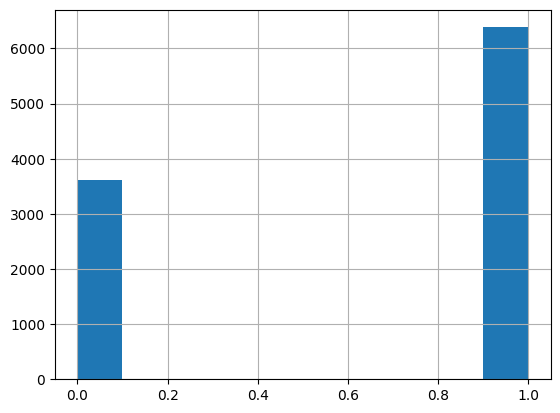

In [28]:
bank['Zero Bank Balance'].hist()

In [29]:
bank.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Bank Balance  
Churn Geography                                       
0     0                      2064               2064  
      1                      1695               1695  
      2                      4204               4204  
1     0                       413                413  
      1                       814                814  
      2                       810                810

**Defining Target variable (y) and Feature variable (x)**

In [31]:
bank.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Bank Balance'],
      dtype='object')

In [32]:
x = bank.drop(['Surname', 'Churn'], axis = 1)

In [33]:
y = bank['Churn']

In [34]:
x.shape, y.shape

((10000, 11), (10000,))

In [35]:
bank['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

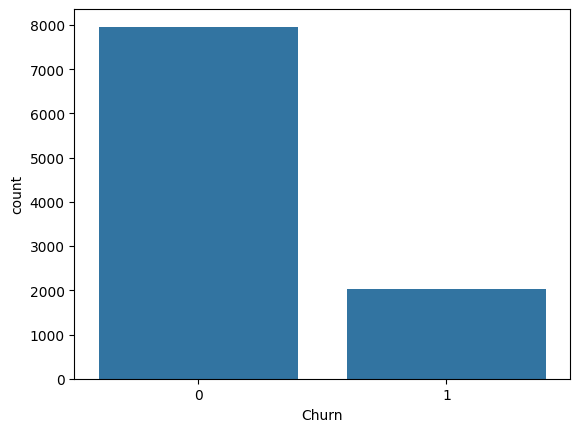

In [39]:
sns.countplot(x = 'Churn', data = bank);

**Random Under Sampling**

In [40]:
from imblearn.under_sampling import RandomUnderSampler

In [49]:
Usampler = RandomUnderSampler(random_state = 2529)

In [50]:
x_Usampler, y_Usampler = Usampler.fit_resample(x, y)

In [51]:
x_Usampler.shape, y_Usampler.shape, x.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [52]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [53]:
 y_Usampler.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

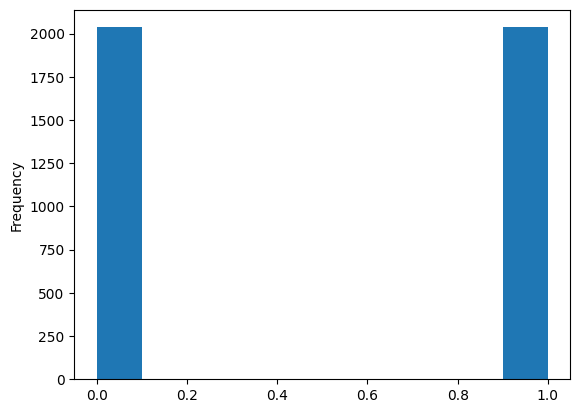

In [54]:
 y_Usampler.plot(kind = 'hist')

**Random Over Sampling**

In [56]:
from imblearn.over_sampling import RandomOverSampler

In [57]:
Osampler = RandomOverSampler(random_state = 2529)

In [58]:
x_Osampler, y_Osampler = Osampler.fit_resample(x, y)

In [59]:
x_Osampler.shape, y_Osampler.shape, x.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [60]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [61]:
y_Osampler.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

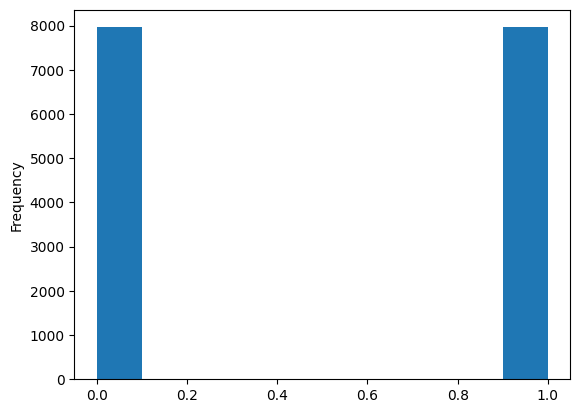

In [62]:
y_Osampler.plot(kind = 'hist')

**Train Test Split**

In [63]:
from sklearn.model_selection import train_test_split

**Spliting Original Data**

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 2529)

**Spliting Random Under Sample Data**

In [65]:
x_Usampler_train, x_Usampler_test, y_Usampler_train, y_Usampler_test = train_test_split(x_Usampler, y_Usampler, test_size = 0.3, random_state= 2529)

**Spliting Random Over Sample Data**

In [66]:
x_Osampler_train, x_Osampler_test, y_Osampler_train, y_Osampler_test = train_test_split(x_Osampler, y_Osampler, test_size = 0.3, random_state= 2529)

**Data Preprocessing**

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
sc = StandardScaler()

In [70]:
x_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [71]:
x_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [72]:
x_Usampler_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_Usampler_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [73]:
x_Usampler_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_Usampler_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [74]:
x_Osampler_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_Osampler_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [75]:
x_Osampler_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_Osampler_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

**Support Vector Machine Classifier** **: Original Data**

In [77]:
from sklearn.svm import SVC

In [78]:
svc = SVC()

In [80]:
svc.fit(x_train, y_train)

SVC()

In [81]:
y_pred = svc.predict(x_test)

In [82]:
from sklearn.metrics import confusion_matrix, classification_report

In [83]:
confusion_matrix(y_test, y_pred)

array([[2381,   33],
       [ 436,  150]])

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



**Hyperparameter Tunning**

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
p_grid = {'C': [0.1, 1, 10],
          'gamma': [1, 0.1, 0.01],
          'kernel': ['rbf'],
          'class_weight': ['balanced']}

In [89]:
grid = GridSearchCV( SVC(), p_grid, refit=True, verbose=2, cv = 2)
grid.fit(x_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.7s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [90]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [91]:
grid_predictions = grid.predict(x_test)

In [92]:
confusion_matrix(y_test, grid_predictions)

array([[2159,  255],
       [ 343,  243]])

In [93]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



**Model with RUS**

In [94]:
svc_rus = SVC()
svc_rus.fit(x_Usampler_train, y_Usampler_train)
y_pred_rus = svc_rus.predict(x_Usampler_test)
confusion_matrix(y_Usampler_test, y_pred_rus)
print(classification_report(y_Usampler_test, y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



**Hyperparamater Tunning for RUS model**

In [96]:
p_grid = {'C': [0.1, 1, 10],
          'gamma': [1, 0.1, 0.01],
          'kernel': ['rbf'],
          'class_weight': ['balanced']}
grid_rus = GridSearchCV( SVC(), p_grid, refit=True, verbose=2, cv = 2)
grid_rus.fit(x_Usampler_train, y_Usampler_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [97]:
print(grid_rus.best_estimator_)
grid_predictions_rus = grid_rus.predict(x_Usampler_test)
confusion_matrix(y_Usampler_test, grid_predictions_rus)
print(classification_report(y_Usampler_test, grid_predictions_rus))

SVC(C=1, class_weight='balanced', gamma=0.1)
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



**Model with ROS**

In [98]:
svc_ros = SVC()
svc_ros.fit(x_Osampler_train, y_Osampler_train)
y_pred_ros = svc_ros.predict(x_Osampler_test)
confusion_matrix(y_Osampler_test, y_pred_ros)
print(classification_report(y_Osampler_test, y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



**Hyperparamter Tunning for ROS model**

In [99]:
p_grid = {'C': [0.1, 1, 10],
          'gamma': [1, 0.1, 0.01],
          'kernel': ['rbf'],
          'class_weight': ['balanced']}
grid_ros = GridSearchCV( SVC(), p_grid, refit=True, verbose=2, cv = 2)
grid_ros.fit(x_Osampler_train, y_Osampler_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.9s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   8.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   6.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   8.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   8.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   7.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   6.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.8s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [100]:
print(grid_ros.best_estimator_)
grid_predictions_ros = grid_ros.predict(x_Osampler_test)
confusion_matrix(y_Osampler_test, grid_predictions_ros)
print(classification_report(y_Osampler_test, grid_predictions_ros))

SVC(C=10, class_weight='balanced', gamma=1)
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



In [103]:
confusion_matrix(y_Osampler_test, grid_predictions_ros)

array([[2047,  332],
       [  68, 2331]])

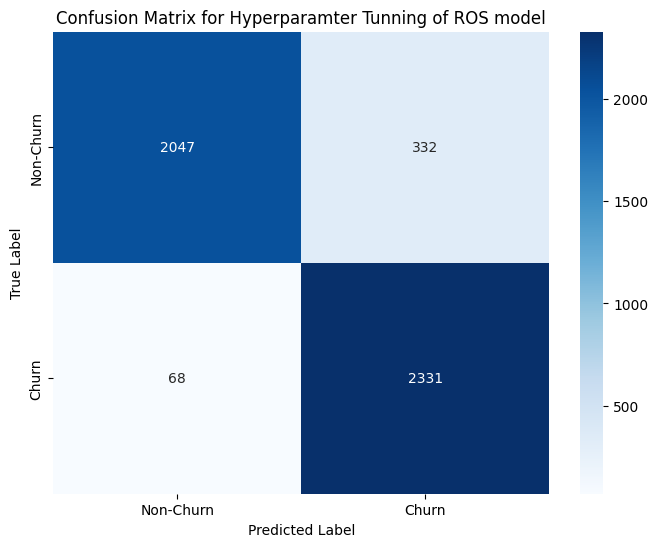

In [105]:
cm = confusion_matrix(y_Osampler_test, grid_predictions_ros)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Churn', 'Churn'],
            yticklabels=['Non-Churn', 'Churn'])
plt.title('Confusion Matrix for Hyperparamter Tunning of ROS model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()